In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 1. Get the dataset from the Logarithmic Regressions Dataset folder
# 2. Load the .csv file into a data frame in Python

df = pd.read_csv("PythonHW4_heart_dataset_for_log_regression.csv")
print(df.head(n=5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [3]:
# 3. Describe the data, provide information on the dataset.

print(df.describe())
print(df.info())
print(df.dtypes)

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

Null values are: age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


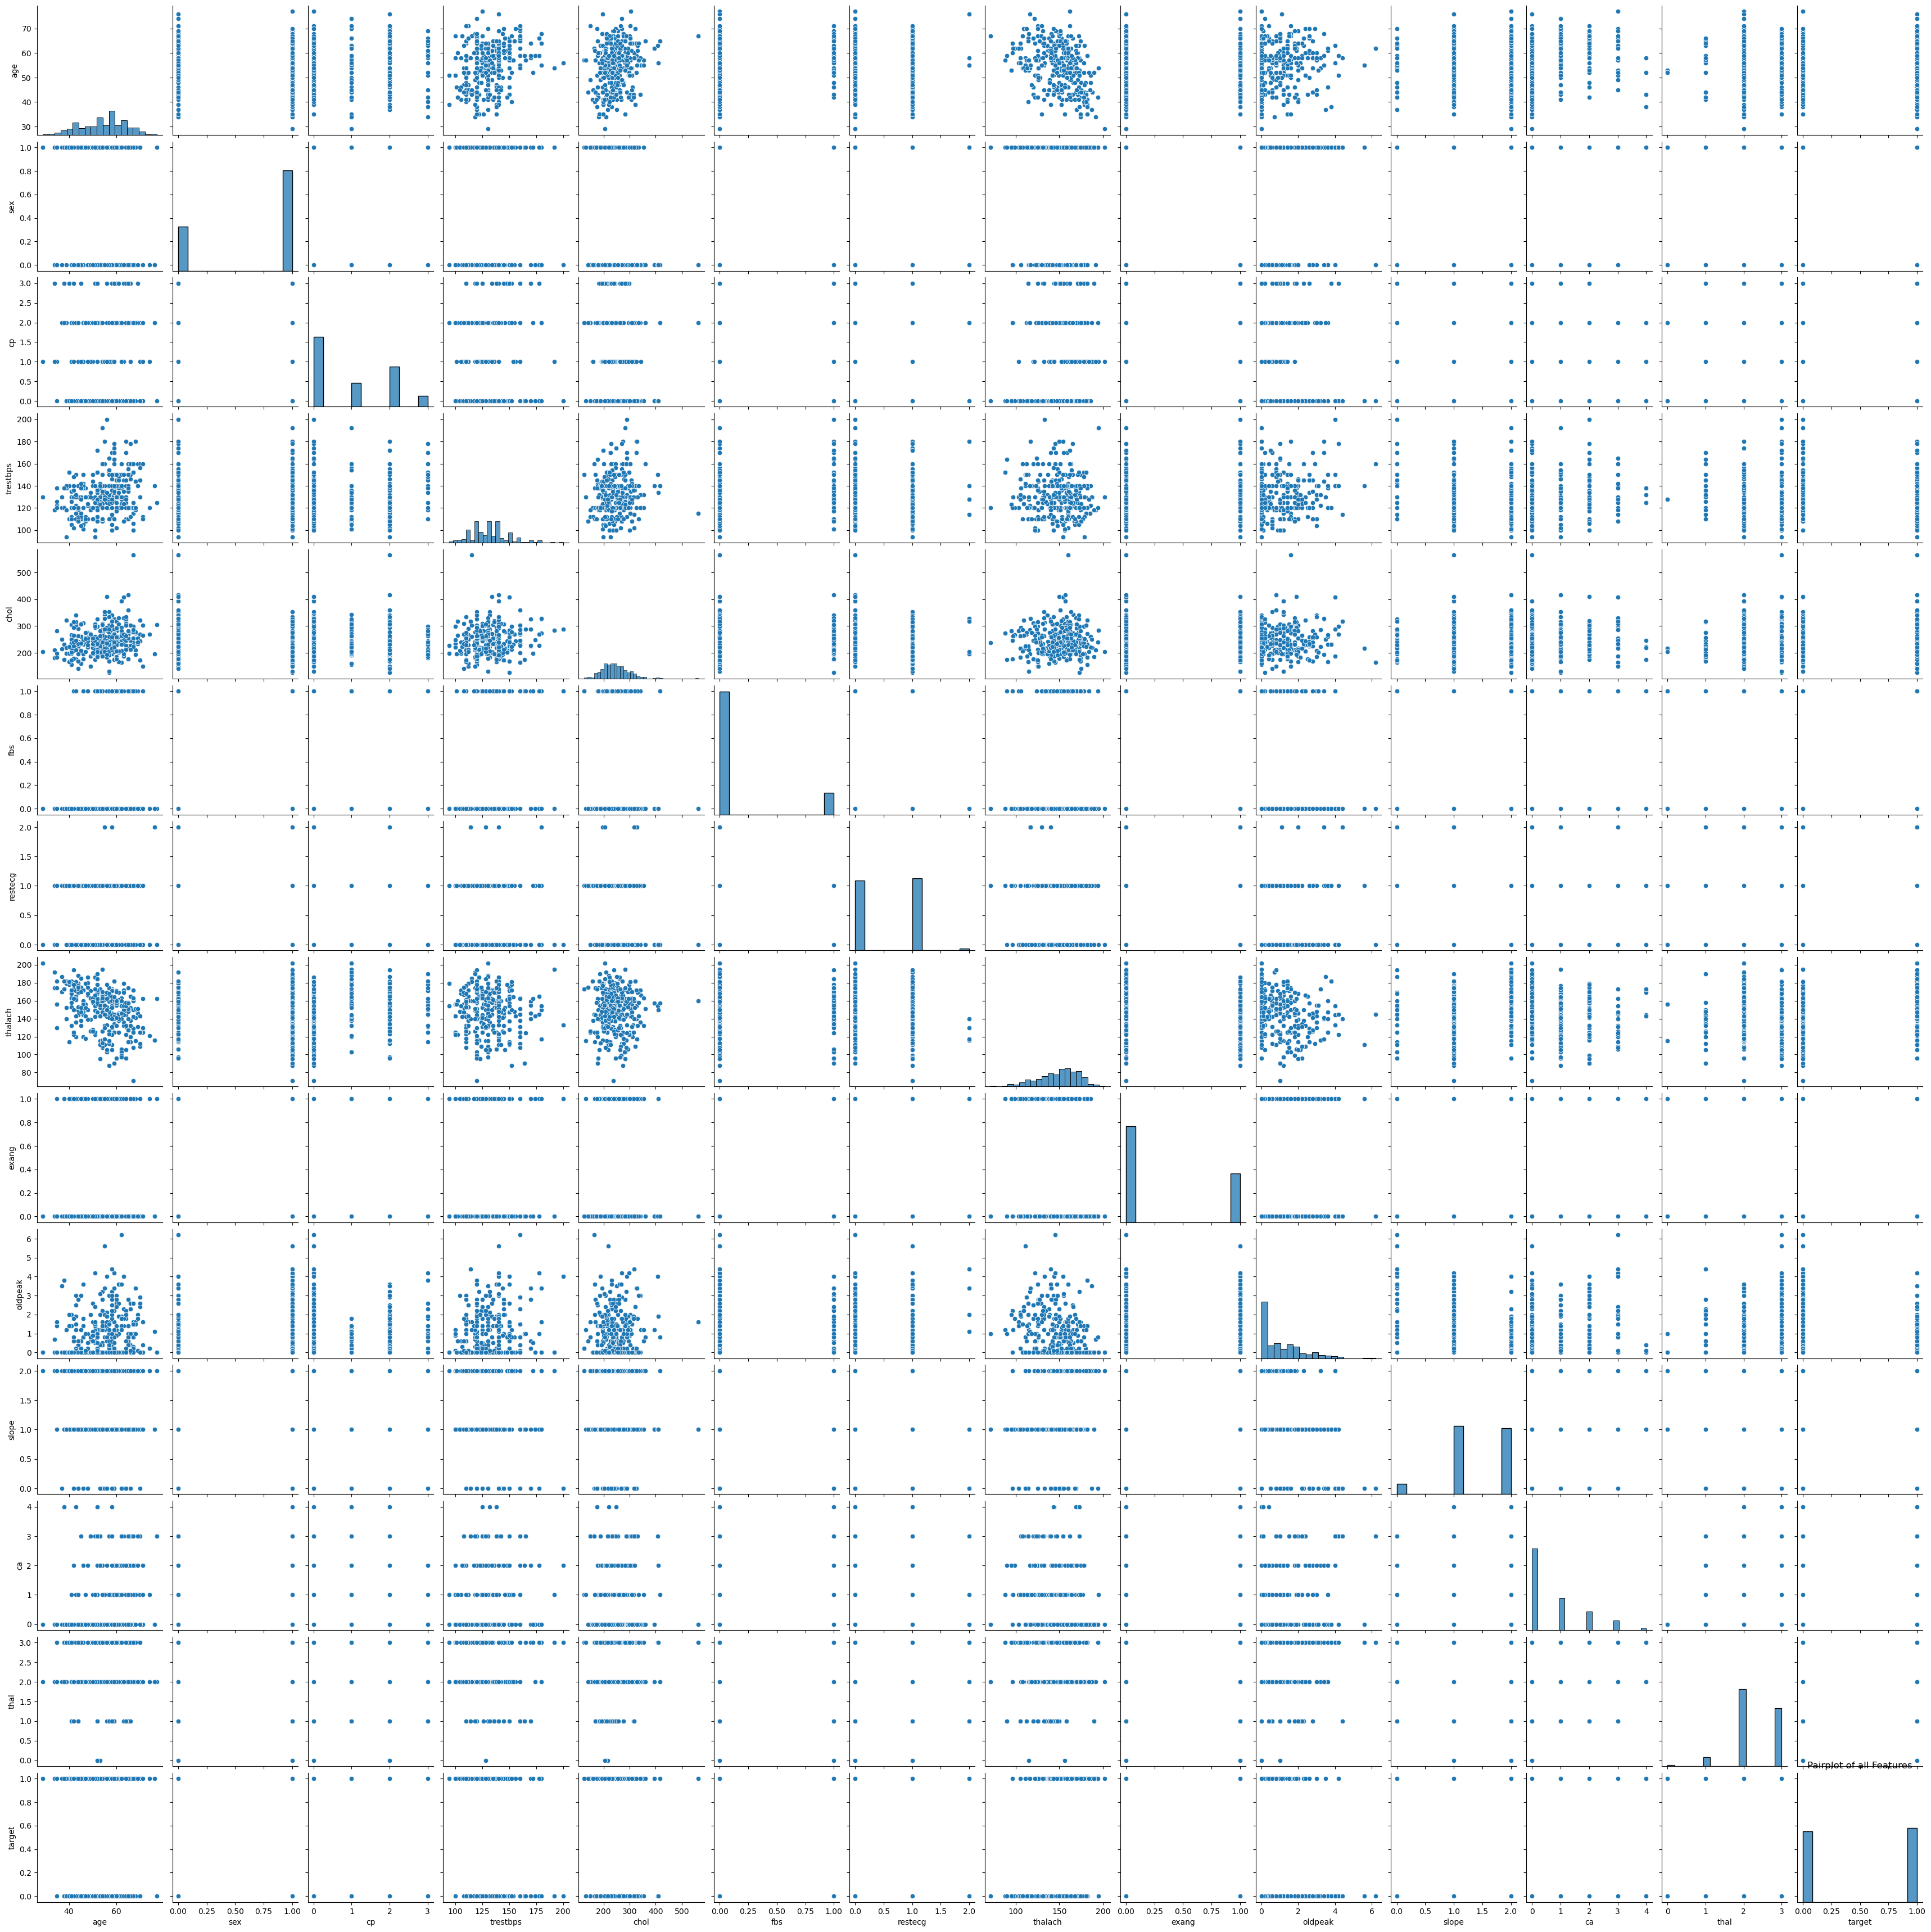

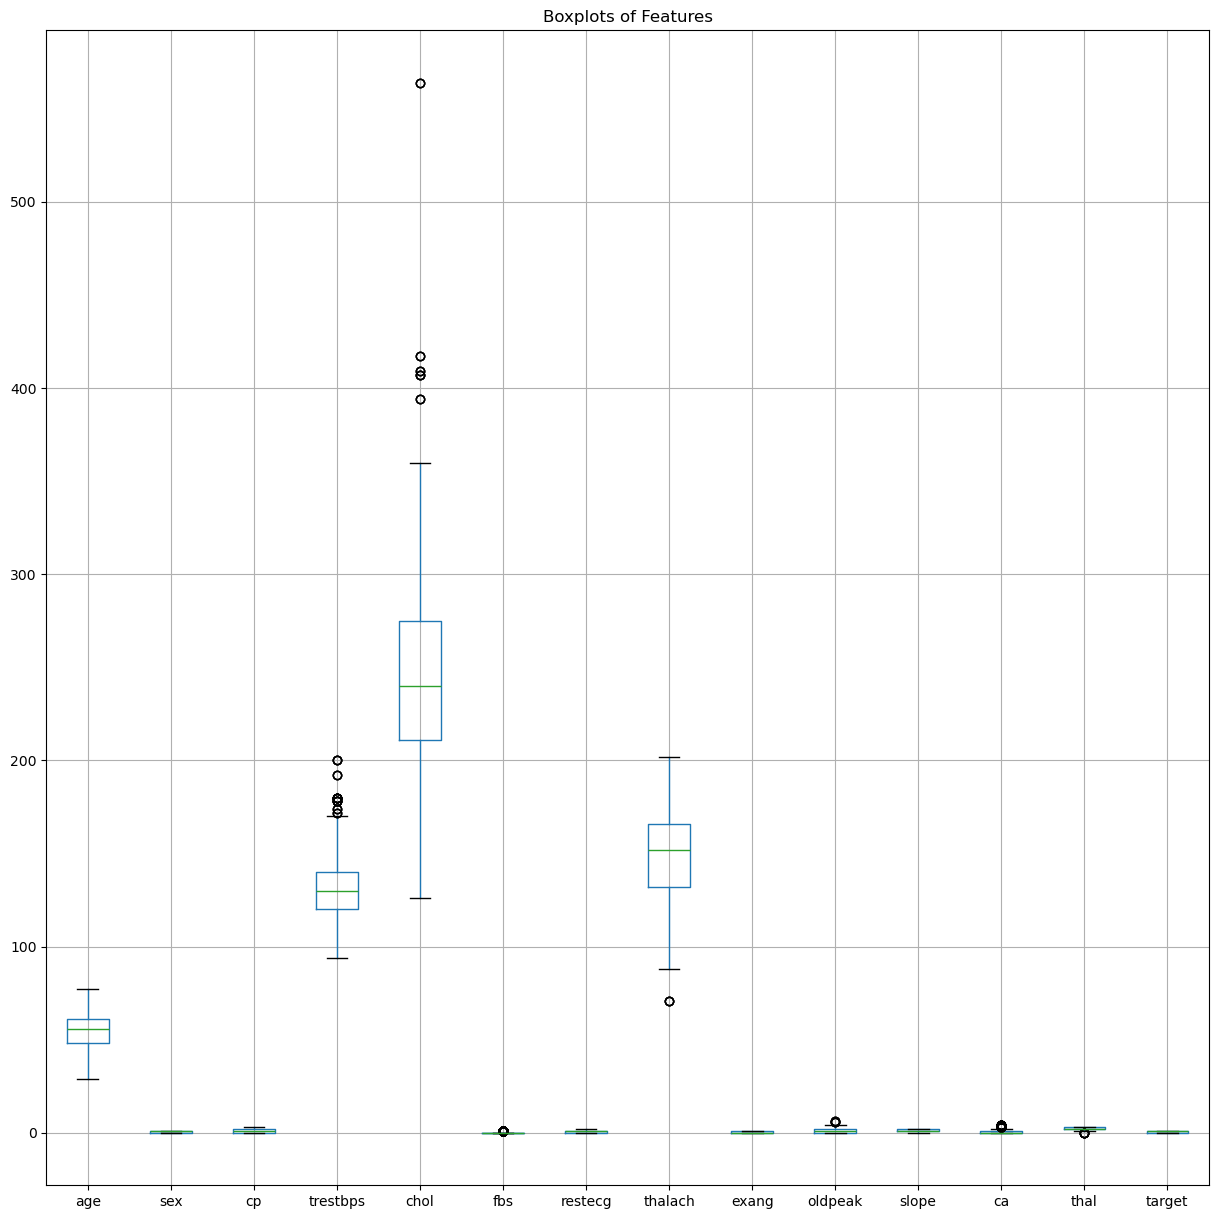

In [4]:
# 5. Preprocess data if needed.

print("Null values are:", df.isnull().sum()) # Check for null-values

sns.pairplot(df) # Pairplot to check for correlation
plt.title('Pairplot of all Features')
plt.show()

df.boxplot(figsize=(15,15))
plt.title('Boxplots of Features') # Boxplot to check for outliers
plt.show()


In [5]:
# Find rows that are duplicates
duplicate = df.duplicated()
print(duplicate.sum())
duplicate

# There are 723 duplicate rows in a dataset of 1024. 
# Which means we can't eliminate duplicates, especially because there is no unique id assigned to patients here. 

723


0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

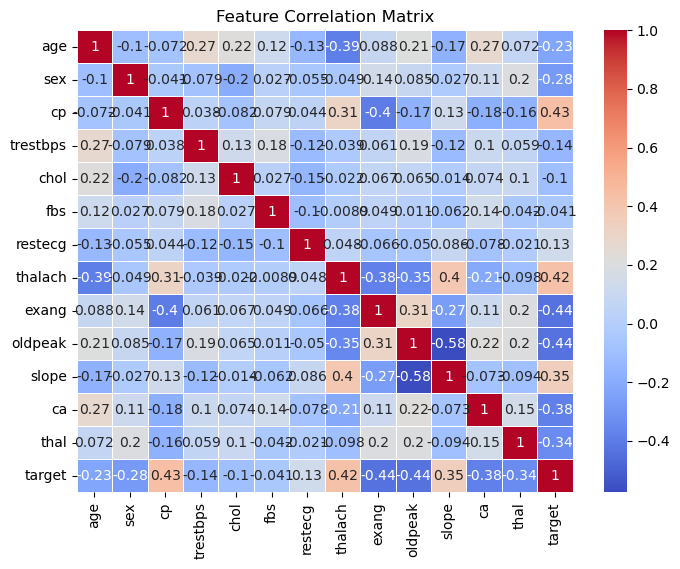

In [6]:
# 6. Print the correlation coefficient matrix.

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [7]:
# 7. Normalize data using appropriate scaling.

scaler = MinMaxScaler() # Using MinMaxScaler assuming data is not normally distributed

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_scaled.head())

        age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167  1.0  0.0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1  0.500000  1.0  0.0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2  0.854167  1.0  0.0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3  0.666667  1.0  0.0  0.509434  0.175799  0.0      0.5  0.687023    0.0   
4  0.687500  0.0  0.0  0.415094  0.383562  1.0      0.5  0.267176    0.0   

    oldpeak  slope    ca      thal  target  
0  0.161290    1.0  0.50  1.000000     0.0  
1  0.500000    0.0  0.00  1.000000     0.0  
2  0.419355    0.0  0.00  1.000000     0.0  
3  0.000000    1.0  0.25  1.000000     0.0  
4  0.306452    0.5  0.75  0.666667     0.0  


In [8]:
# 4. Conduct Logarithmic Regression
# 8. Train the model (80-20 split)
# 9. Split the list of labels accordingly.

X = df_scaled.drop('target', axis=1)
y = df_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# 11. Make predictions using logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [10]:
# 12. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8585365853658536
Confusion Matrix:
 [[77 21]
 [ 8 99]]


Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.79      0.84        98
         1.0       0.82      0.93      0.87       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



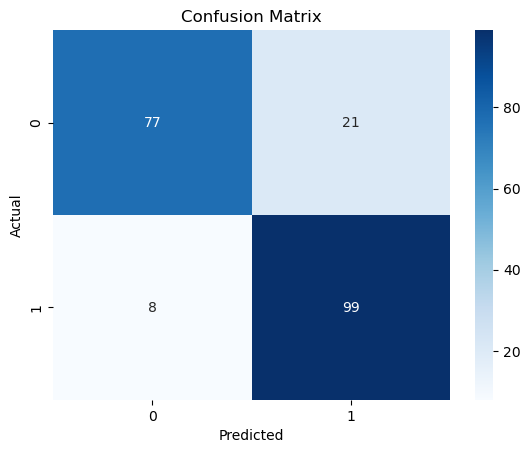

In [11]:
# 13. Generate relevant graphs
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

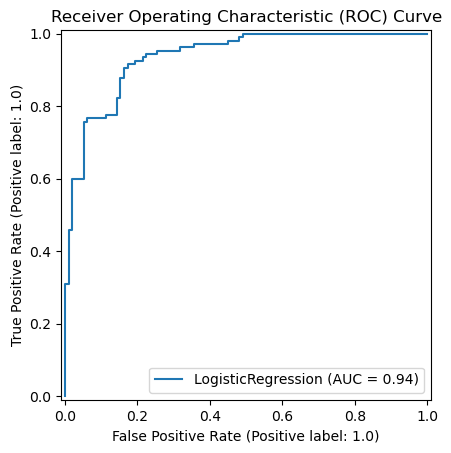

In [12]:
# ROC Curve

from sklearn.metrics import RocCurveDisplay, precision_recall_curve, auc

# Plot ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [13]:
# Dropping Fasting Blood Sugar (fbs) and Resting Electrocardiographic Results (restecg)
# column since they have low correlation with target

X_2 = df_scaled.drop(['fbs','restecg','target'], axis=1)
y_2 = df_scaled['target']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 0)

model = LogisticRegression()
model.fit(X_train_2, y_train_2)
y_pred_2 = model.predict(X_test_2)

print("Accuracy:", accuracy_score(y_test_2, y_pred_2))
print("Confusion Matrix:\n", confusion_matrix(y_test_2, y_pred_2))
print("Classification Report:\n", classification_report(y_test_2, y_pred_2))

Accuracy: 0.8780487804878049
Confusion Matrix:
 [[ 80  18]
 [  7 100]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.82      0.86        98
         1.0       0.85      0.93      0.89       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [14]:
# This increases the accuracy of the model from 0.85 to 0.88.